In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [2]:
bc = pd.read_csv('breast-cancer-wisconsin-data/data.csv')

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
dum = pd.get_dummies(bc.diagnosis)
bc = pd.concat([bc, dum], axis = 1)
bc = bc.drop('diagnosis', axis = 1)
bc = bc.drop('B', axis = 1)
bc = bc.drop('Unnamed: 32', axis = 1)

In [7]:
bc.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


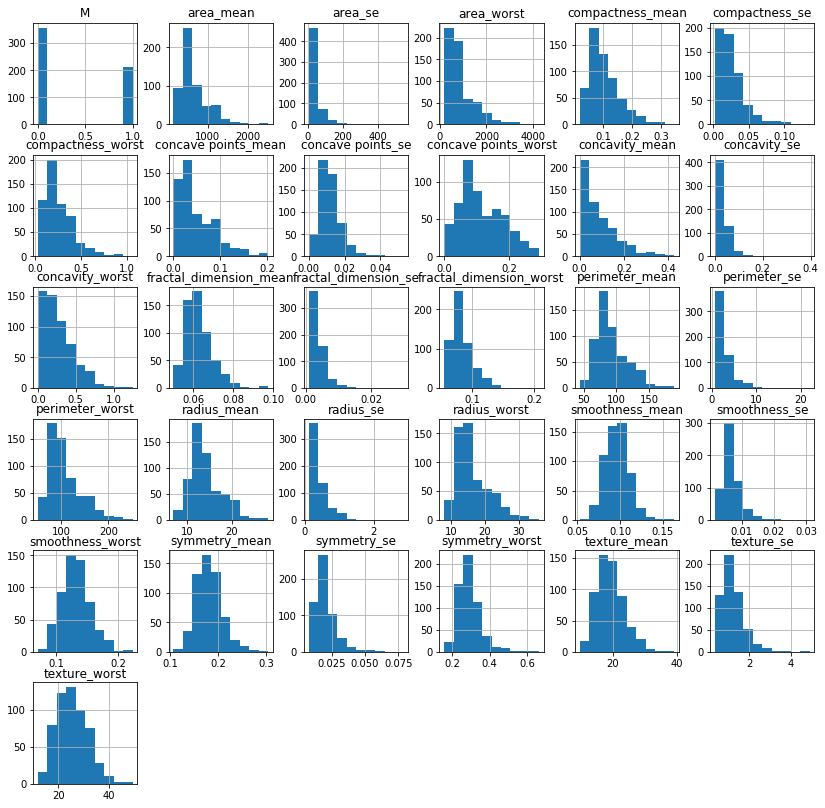

In [8]:
bc.drop(['id'], axis = 1).hist(figsize = (14,14))
plt.show()

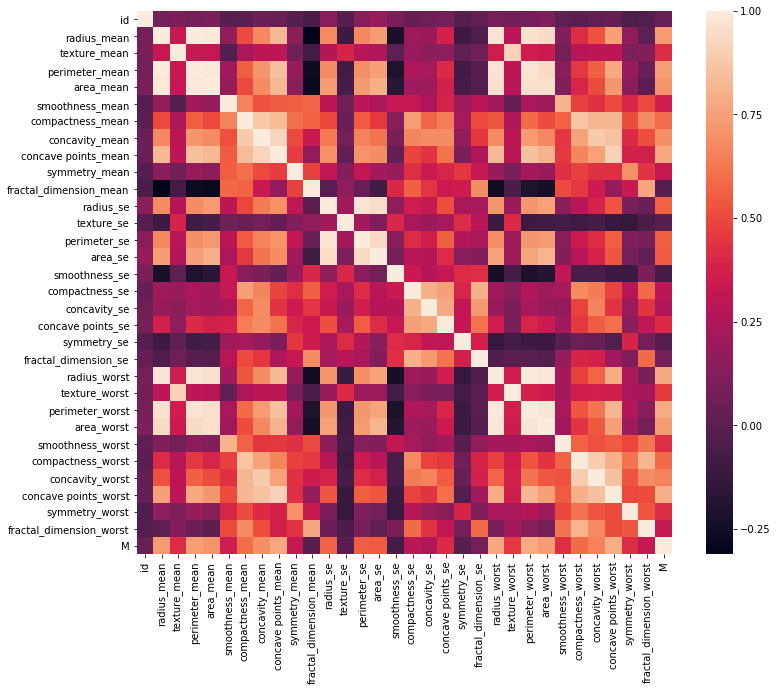

In [9]:
plt.figure(figsize = (12,10))
sns.heatmap(bc.corr())
plt.show()

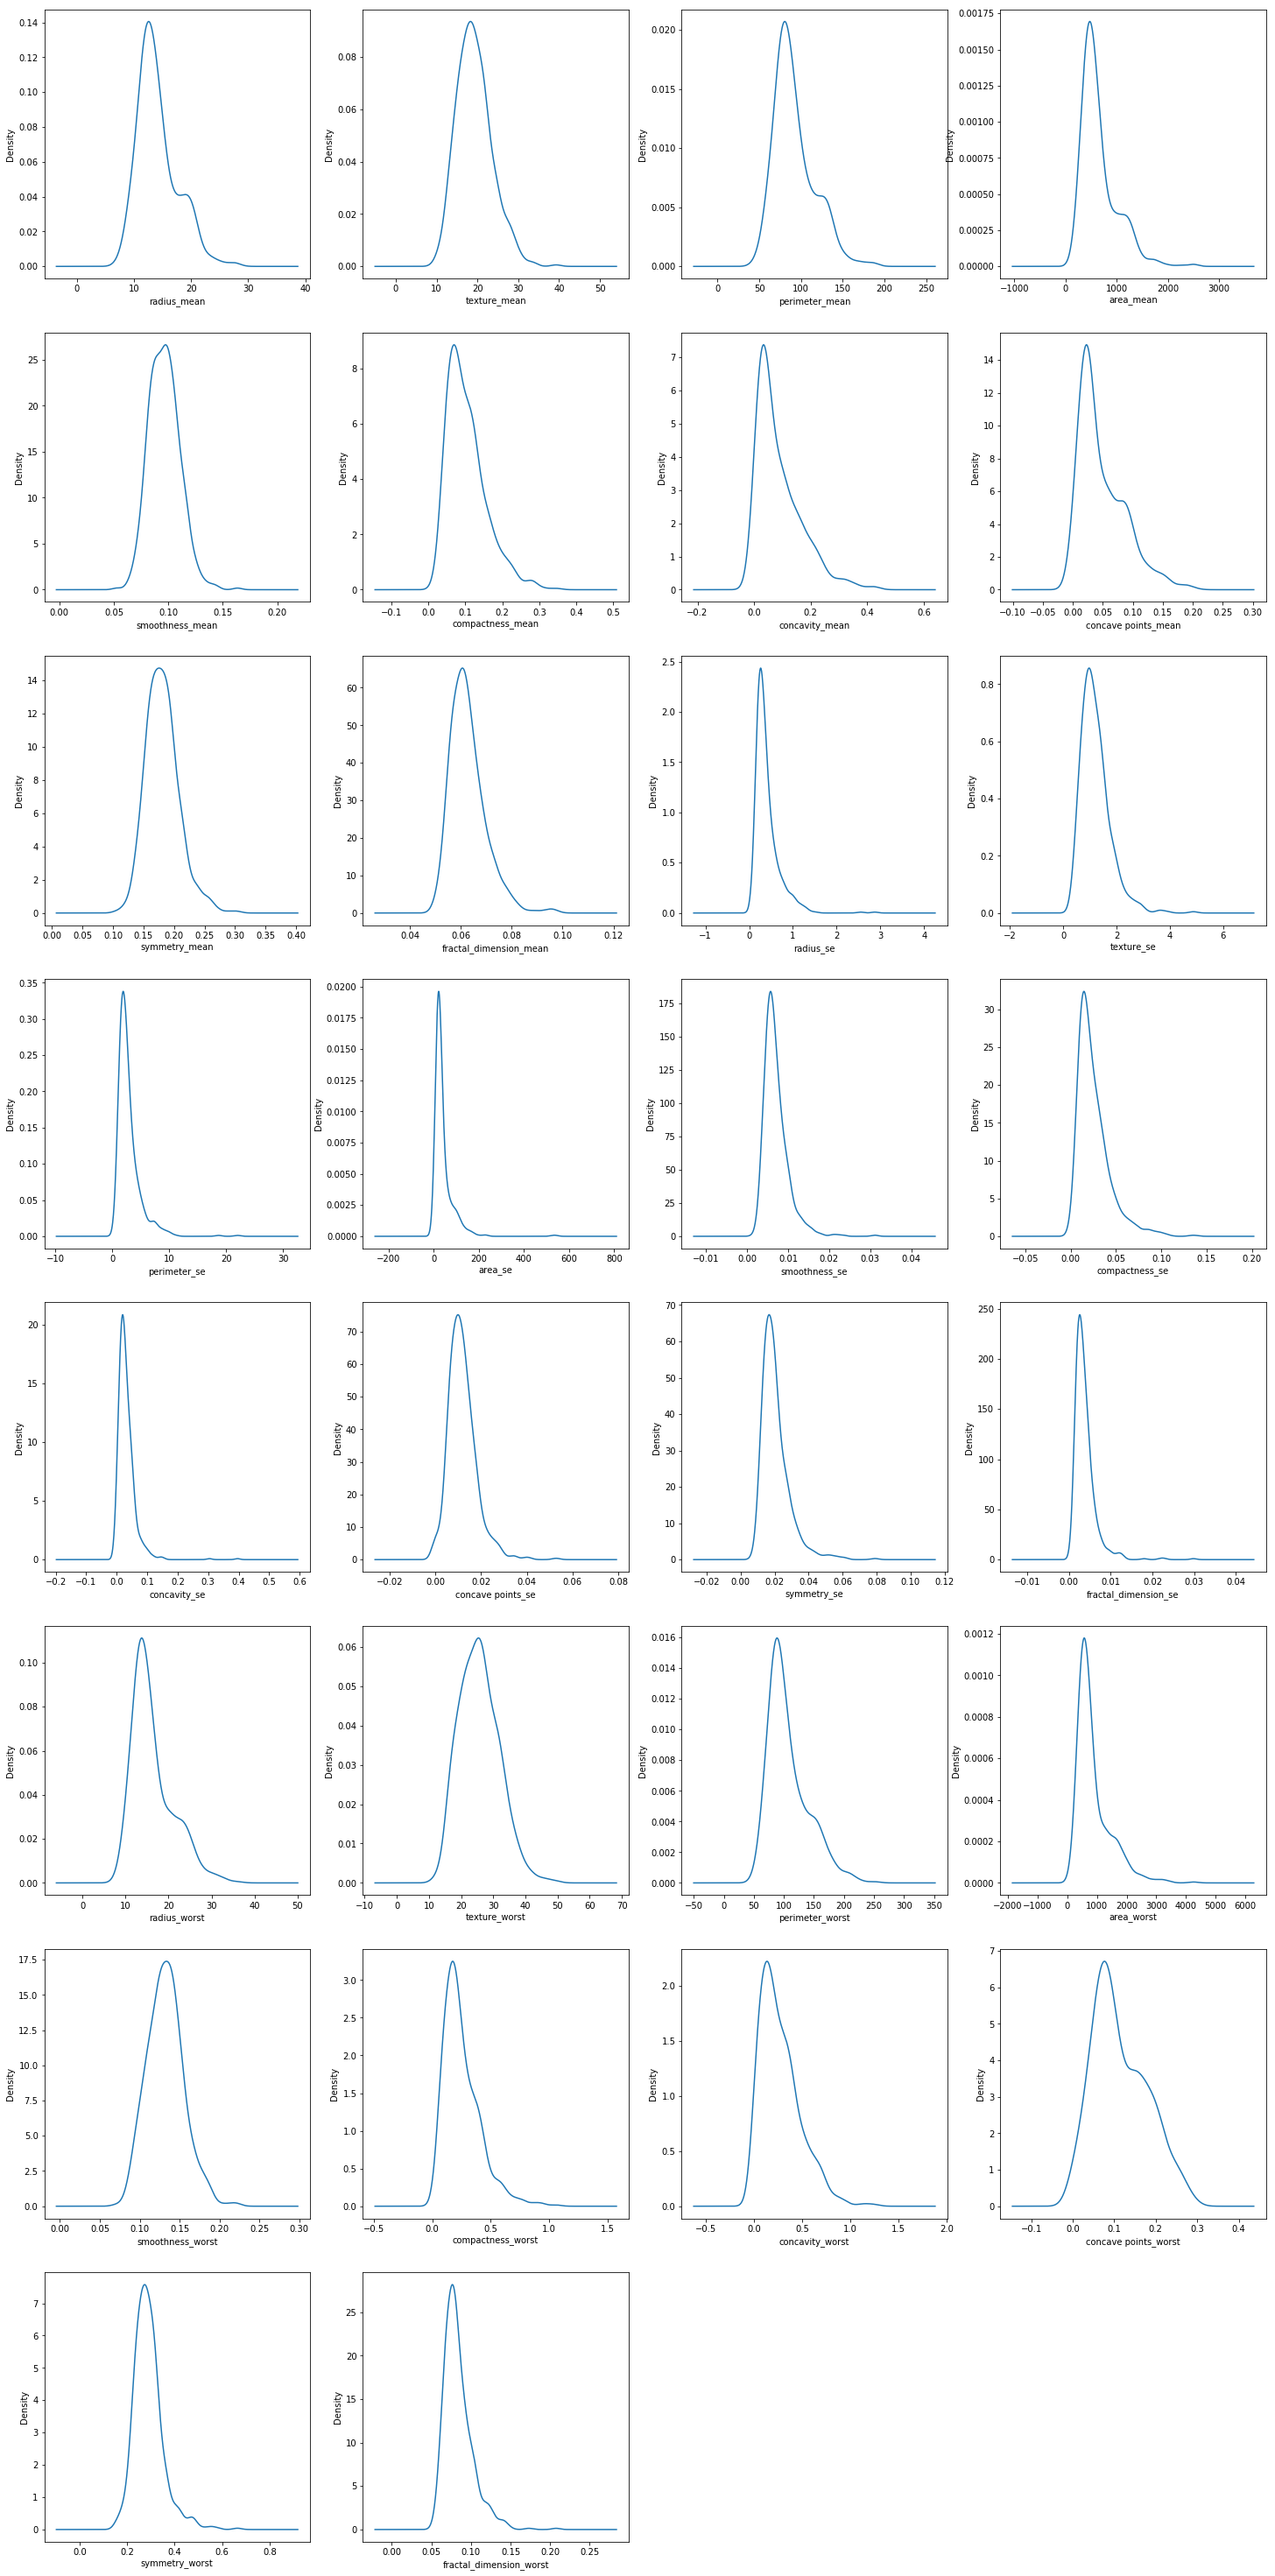

In [10]:
def num_densityplot():
    for n in range(1, 31):
        plt.subplot(9, 4, n)
        bc.iloc[:, n].plot.kde()
        plt.xlabel(bc.iloc[:, n].name)
        
plt.figure(figsize = (25, 60))
num_densityplot()
plt.show()

In [11]:
bc2 = bc[['radius_mean','perimeter_mean','area_mean','concavity_mean',
         'concave points_mean','radius_worst','perimeter_worst','area_worst',
         'concave points_worst']]

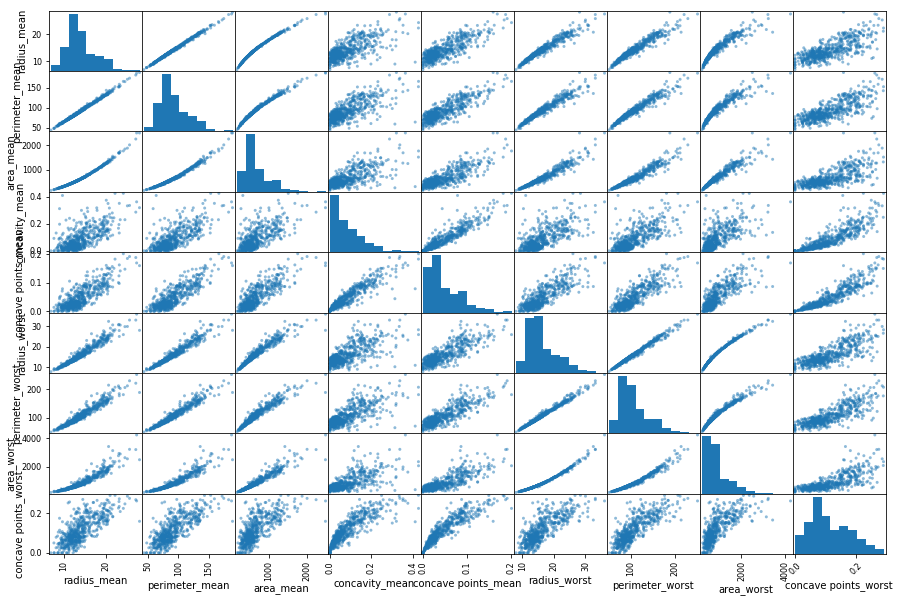

In [12]:
a = pd.plotting.scatter_matrix(bc2, figsize = (15, 10))
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

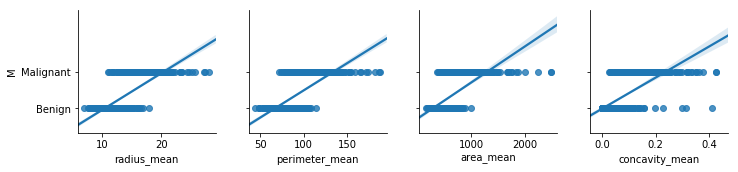

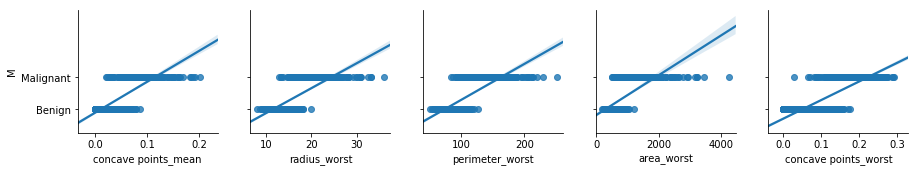

In [13]:
sns.pairplot(bc, x_vars = bc2.columns[0: 4], y_vars = ['M'], kind = 'reg')
plt.yticks([0.0, 1.0],['Benign', 'Malignant'])
sns.pairplot(bc, x_vars = bc2.columns[4: ], y_vars = ['M'], kind = 'reg')
plt.yticks([0.0, 1.0],['Benign', 'Malignant'])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

from yellowbrick.classifier import ConfusionMatrix

In [15]:
X = bc.drop(['id','M'], axis = 1).values
y = bc.M

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [17]:
def model_fit(x):
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    model_fit.accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score',accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    model_cm = ConfusionMatrix(
    x, classes = ['Malignat', 'Benign'],
    label_encoder = {1 : 'Malignat', 0 : 'Benign'})
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    
    model_cm.poof() 

In [18]:
list = []
for i in range(1,10): 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    list.append(accuracy_score(y_test, y_pred))
   
for n in range(0, len(list)):
    if list[n] == max(list):
        i = n+1

Accuracy Score 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



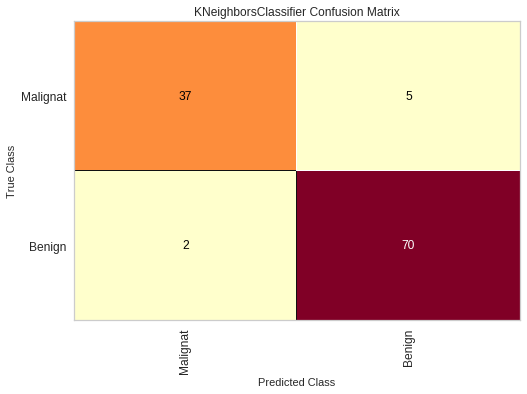

In [19]:
model_fit(KNeighborsClassifier(n_neighbors = i))
KNN = model_fit.accuracy

In [20]:
from sklearn.linear_model import LogisticRegression

Accuracy Score 0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



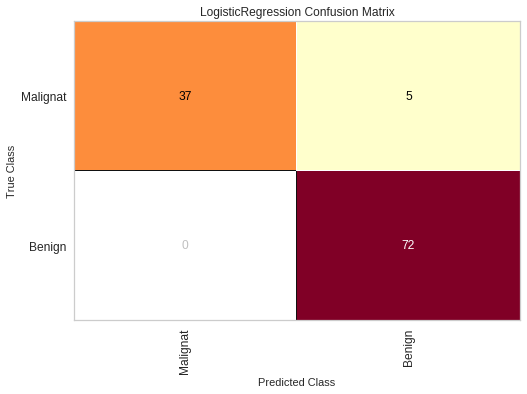

In [21]:
model_fit(LogisticRegression())
Logistic = model_fit.accuracy

In [22]:
from sklearn.naive_bayes import GaussianNB

Accuracy Score 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

   micro avg       0.95      0.95      0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



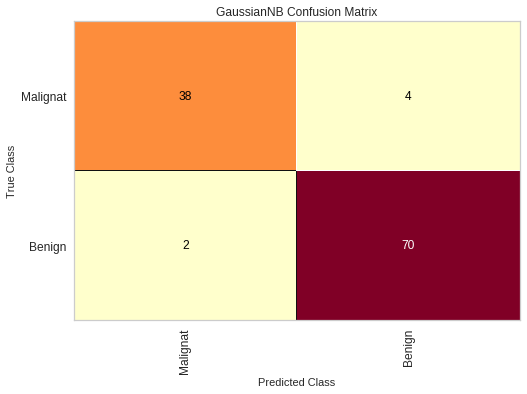

In [23]:
model_fit(GaussianNB())
Gaussian = model_fit.accuracy

In [24]:
from sklearn import tree

Accuracy Score 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



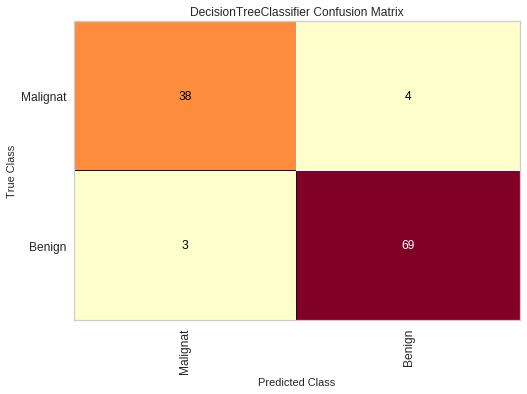

In [25]:
model_fit(tree.DecisionTreeClassifier())
Tree = model_fit.accuracy

In [26]:
from sklearn.ensemble import RandomForestClassifier

Accuracy Score 0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



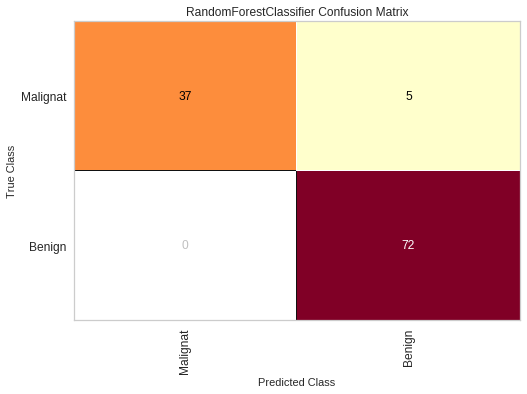

In [27]:
model_fit(RandomForestClassifier(n_estimators = 100, max_depth =10, random_state = 1))
RandomForest = model_fit.accuracy

In [28]:
list=[]
ival = range(1, 100)
jval = range(1,100)
for i,j in zip(ival, jval): 
    clfr = RandomForestClassifier(n_estimators = i, max_depth = j, random_state = 1)
    clfr.fit(X_train, y_train)
    y_pred = clfr.predict(X_test)
    
    list.append((accuracy_score(y_test, y_pred)))

In [29]:
list = pd.DataFrame(list)

In [30]:
list[list == list.max()].dropna().head()

,0
5,0.95614
6,0.95614
7,0.95614
8,0.95614
9,0.95614


In [31]:
from xgboost import XGBClassifier

Accuracy Score 0.956140350877193
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



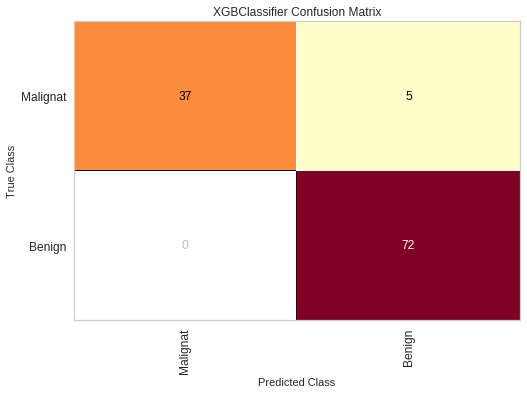

In [32]:
model_fit(XGBClassifier())
XGBClf = model_fit.accuracy

In [33]:
scores_list_1 = ['KNN','Logistic','Gaussian','Tree','RandomForest','XGBClassifier']
scores_1 = [KNN, Logistic, Gaussian, Tree, RandomForest, XGBClf]

In [34]:
score_df_classification = pd.DataFrame([scores_list_1, scores_1]).T

In [35]:
score_df_classification.index = score_df_classification[0]
del score_df_classification[0]
score_df_classification

,1
0,
KNN,0.938596
Logistic,0.95614
Gaussian,0.947368
Tree,0.964912
RandomForest,0.95614
XGBClassifier,0.95614
